In [1]:
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from zipfile import ZipFile
import os
import time
from datetime import datetime
import numpy as np

#download a zip file and extract it
def process_file(filename,uri):
    zip_path = keras.utils.get_file(origin=uri, fname=filename)
    zip_file = ZipFile(zip_path)
    zip_file.extractall()

Process 2016 - 2021
(262903, 31)


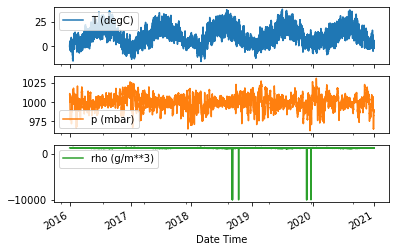

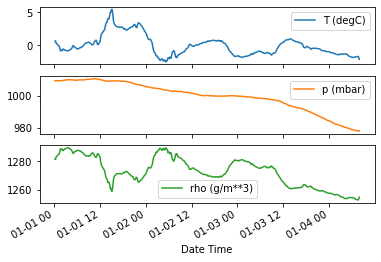

In [2]:
#download only required data or update
dftemp= []
#we go 5 years back and download data if not local
how_many_years = 5
today = datetime.today()
print(f"Process {today.year-how_many_years} - {today.year}")
#each year except current has 2 files for a 6 month period
for i in range(today.year-how_many_years, today.year):
    filename = f"mpi_saale_{i}a.csv"
    if(not os.path.exists(filename)):
        print(f"Not found: {filename}")
        process_file(filename, f"https://www.bgc-jena.mpg.de/wetter/mpi_saale_{i}a.zip")
    dftemp.append(pd.read_csv(filename))
    filename = f"mpi_saale_{i}b.csv"
    if (not os.path.exists(filename)):
        print(f"Not found: {filename}")
        process_file(filename, f"https://www.bgc-jena.mpg.de/wetter/mpi_saale_{i}b.zip")
    dftemp.append(pd.read_csv(filename))
#if we run this script after june then there is another file prefixed mpi_saale_<year>a.zip
if today.month>6:
    filename = f"mpi_saale_{today.year}a.csv"
    if (not os.path.exists(filename)):
        print(f"Not found: {filename}")
        process_file(filename, f"https://www.bgc-jena.mpg.de/wetter/mpi_saale_{today.year}a.zip")
    dftemp.append(pd.read_csv(filename))
#download current data
#filename = "mpi_saale.csv"
#if (not os.path.exists(filename) or time.time() - os.path.getmtime(filename) > 3600 * 24):
#    print(f"Not found: {filename}")
#    process_file(filename, "https://www.bgc-jena.mpg.de/wetter/mpi_saale.zip")
#dftemp.append(pd.read_csv(filename))

#concatenate all csv files
df = pd.concat(dftemp, ignore_index=True) 
print(np.shape(df))
df.drop(df.iloc[:, 14:31], inplace = True, axis = 1) 

date_time = pd.to_datetime(df.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
#show raw data preview


plot_cols = ['T (degC)', 'p (mbar)', 'rho (g/m**3)']
plot_features = df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)
plt.show()

plot_features = df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)
plt.show()



In [3]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),262903.0,999.871435,9.058644,963.19,994.72,1000.28,1005.71,1030.63
T (degC),262903.0,10.501675,8.197626,-15.07,4.50,9.88,16.18,37.41
rh (%),262903.0,66.315503,293.284388,-9999.00,61.44,77.60,92.80,100.00
sh (g/kg),262903.0,-2.306323,290.627762,-9999.00,4.05,5.67,7.95,16.45
Tpot (K),262903.0,283.676990,8.318748,257.57,277.71,283.16,289.43,310.90
Tdew (degC),262903.0,-2.935376,290.667133,-9999.00,0.82,5.57,10.50,21.74
VPmax (mbar),262903.0,14.492805,8.367328,1.89,8.43,12.20,18.42,64.23
VPact (mbar),262903.0,1.373823,290.752872,-9999.00,6.48,9.08,12.71,26.06
VPdef (mbar),262903.0,-3.775582,290.639477,-9999.00,0.70,2.35,5.81,55.21
H2OC (mmol/mol),262903.0,1.379918,290.753205,-9999.00,6.49,9.08,12.71,26.19


In [4]:
#cleanup for -9999 values
wv = df['wv (m/s)']
bad_wv = wv == -9999.0
wv[bad_wv] = 0.0

rh = df['rh (%)']
bad_rh = rh == -9999.0
rh[bad_rh] = 0

col = df['sh (g/kg)']
bad_col = col == -9999.0
col[bad_col] = 0.0

col = df['Tdew (degC)']
bad_col = col == -9999.0
col[bad_col] = 0.0

col = df['VPact (mbar)']
bad_col = col == -9999.0
col[bad_col] = 11.86

col = df['Tdew (degC)']
bad_col = col == -9999.0
col[bad_col] = 0.0

col = df['VPdef (mbar)']
bad_col = col == -9999.0
col[bad_col] = 0.0

col = df['H2OC (mmol/mol)']
bad_col = col == -9999.0
col[bad_col] = 0.0

col = df['rho (g/m**3)']
bad_col = col == -9999.0
col[bad_col] = 0.0


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
p (mbar),262903.0,999.871435,9.058644,963.19,994.72,1000.28,1005.71,1030.63
T (degC),262903.0,10.501675,8.197626,-15.07,4.50,9.88,16.18,37.41
rh (%),262903.0,74.758837,19.984135,0.00,61.44,77.60,92.80,100.00
sh (g/kg),262903.0,6.137011,2.632196,0.00,4.05,5.67,7.95,16.45
Tpot (K),262903.0,283.676990,8.318748,257.57,277.71,283.16,289.43,310.90
Tdew (degC),262903.0,5.507959,6.359017,-17.34,0.82,5.57,10.50,21.74
VPmax (mbar),262903.0,14.492805,8.367328,1.89,8.43,12.20,18.42,64.23
VPact (mbar),262903.0,9.827172,4.176231,1.56,6.49,9.09,12.71,26.06
VPdef (mbar),262903.0,4.667752,6.208753,0.00,0.70,2.35,5.81,55.21
H2OC (mmol/mol),262903.0,9.823253,4.196438,0.00,6.49,9.08,12.71,26.19


Text(0, 0.5, 'Wind Velocity [m/s]')

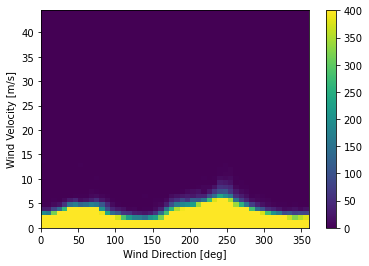

In [6]:
#visualize wind direction x wind speed 
plt.hist2d(df['wd (deg)'], df['wv (m/s)'], bins=(50, 50), vmax=400)
plt.colorbar()
plt.xlabel('Wind Direction [deg]')
plt.ylabel('Wind Velocity [m/s]')

In [7]:
#timestamp convert to something usefull
timestamp_s = date_time.map(datetime.timestamp)
day = 24*60*60
year = (365.2425)*day

df['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
df['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
df['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
df['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))

In [8]:
#split data 70% train 20% validation 10% test
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

In [9]:
#normalize data
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

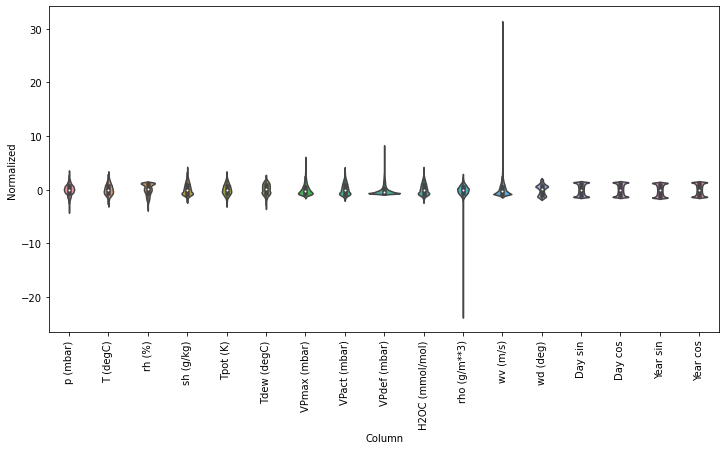

In [10]:
#plot features to see any other issues with data
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

In [11]:
#Window Generator
class WindowGenerator():
  def __init__(self, input_width, label_width, shift,
               train_df=train_df, val_df=val_df, test_df=test_df,
               label_columns=None):
    # Store the raw data.
    self.train_df = train_df
    self.val_df = val_df
    self.test_df = test_df

    # Work out the label column indices.
    self.label_columns = label_columns
    if label_columns is not None:
      self.label_columns_indices = {name: i for i, name in
                                    enumerate(label_columns)}
    self.column_indices = {name: i for i, name in
                           enumerate(train_df.columns)}

    # Work out the window parameters.
    self.input_width = input_width
    self.label_width = label_width
    self.shift = shift

    self.total_window_size = input_width + shift

    self.input_slice = slice(0, input_width)
    self.input_indices = np.arange(self.total_window_size)[self.input_slice]

    self.label_start = self.total_window_size - self.label_width
    self.labels_slice = slice(self.label_start, None)
    self.label_indices = np.arange(self.total_window_size)[self.labels_slice]

  def __repr__(self):
    return '\n'.join([
        f'Total window size: {self.total_window_size}',
        f'Input indices: {self.input_indices}',
        f'Label indices: {self.label_indices}',
        f'Label column name(s): {self.label_columns}'])

In [12]:
def split_window(self, features):
    inputs = features[:, self.input_slice, :]
    labels = features[:, self.labels_slice, :]
    if self.label_columns is not None:
        labels = tf.stack(
            [labels[:, :, self.column_indices[name]] for name in self.label_columns],
            axis=-1)

    # Slicing doesn't preserve static shape information, so set the shapes
    # manually. This way the `tf.data.Datasets` are easier to inspect.
    inputs.set_shape([None, self.input_width, None])
    labels.set_shape([None, self.label_width, None])
    
    return inputs, labels

WindowGenerator.split_window = split_window

In [13]:
#plot predcitions on specific model
def plot(self, model=None, plot_col='T (degC)', max_subplots=3, title=''):
    inputs, labels = self.example
    plt.figure(figsize=(12, 8))
    plot_col_index = self.column_indices[plot_col]
    max_n = min(max_subplots, len(inputs))
    for n in range(max_n):
        plt.subplot(max_n, 1, n+1)
        plt.ylabel(f'{plot_col} [normed]')
        plt.plot(self.input_indices, inputs[n, :, plot_col_index],
             label='Inputs', marker='.', zorder=-10)

        if self.label_columns:
            label_col_index = self.label_columns_indices.get(plot_col, None)
        else:
            label_col_index = plot_col_index
        
        if label_col_index is None:
            continue

        plt.scatter(self.label_indices, labels[n, :, label_col_index],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
        if model is not None:
            predictions = model(inputs)
            plt.scatter(self.label_indices, predictions[n, :, label_col_index],
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

        if n == 0:
            plt.legend()
    plt.suptitle(title)
    plt.xlabel('Time [h]')

WindowGenerator.plot = plot



All shapes are: (batch, time, features)
Window shape: (3, 7, 17)
Inputs shape: (3, 6, 17)
labels shape: (3, 1, 1)


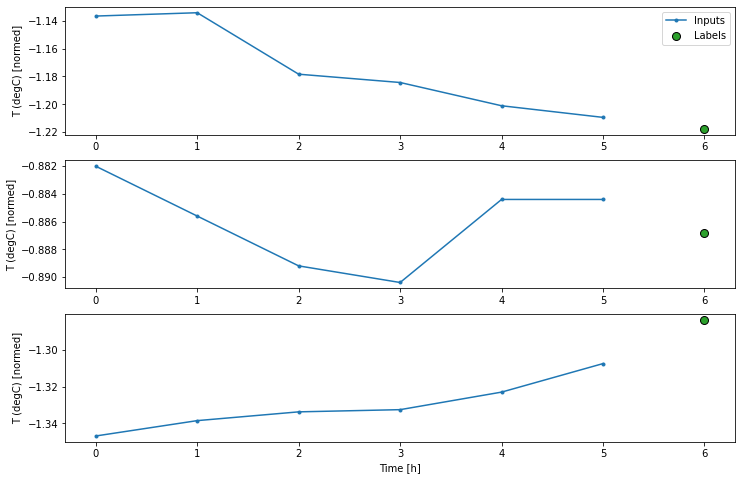

In [14]:
#Test window geerator is working
w2 = WindowGenerator(input_width=6, label_width=1, shift=1,
                     label_columns=['T (degC)'])
example_window = tf.stack([np.array(train_df[:w2.total_window_size]),
                           np.array(train_df[100:100+w2.total_window_size]),
                           np.array(train_df[200:200+w2.total_window_size])])


example_inputs, example_labels = w2.split_window(example_window)


print('All shapes are: (batch, time, features)')
print(f'Window shape: {example_window.shape}')
print(f'Inputs shape: {example_inputs.shape}')
print(f'labels shape: {example_labels.shape}')


w2.example = example_inputs, example_labels

w2.plot()



In [15]:
#create dataset function
def make_dataset(self, data):
  data = np.array(data, dtype=np.float32)
  ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=self.total_window_size,
      sequence_stride=1,
      shuffle=True,
      batch_size=64,)

  ds = ds.map(self.split_window)

  return ds

WindowGenerator.make_dataset = make_dataset


In [16]:
#create all datasets
@property
def train(self):
  return self.make_dataset(self.train_df)

@property
def val(self):
  return self.make_dataset(self.val_df)

@property
def test(self):
  return self.make_dataset(self.test_df)

@property
def example(self):
  """Get and cache an example batch of `inputs, labels` for plotting."""
  result = getattr(self, '_example', None)
  if result is None:
    # No example batch was found, so get one from the `.train` dataset
    result = next(iter(self.train))
    # And cache it for next time
    self._example = result
  return result

WindowGenerator.train = train
WindowGenerator.val = val
WindowGenerator.test = test
WindowGenerator.example = example

In [17]:
#baseline model
class Baseline(tf.keras.Model):
  def __init__(self, label_index=None):
    super().__init__()
    self.label_index = label_index

  def call(self, inputs):
    if self.label_index is None:
      return inputs
    result = inputs[:, :, self.label_index]
    return result[:, :, tf.newaxis]

In [19]:
#evaluate baseline
single_step_window = WindowGenerator(
    input_width=1, label_width=1, shift=1,
    label_columns=['T (degC)'])
single_step_window

#3 days back 24 hours ahead
wide_window = WindowGenerator(
    input_width=24, label_width=24, shift=24,
    label_columns=['T (degC)'])
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', baseline(wide_window.example[0]).shape)

baseline = Baseline(label_index=column_indices['T (degC)'])

baseline.compile(loss=tf.losses.MeanSquaredError(),
                 metrics=[tf.metrics.MeanAbsoluteError()])

val_performance = {}
performance = {}
val_performance['Baseline'] = baseline.evaluate(wide_window.val)
performance['Baseline'] = baseline.evaluate(wide_window.test, verbose=0)

Input shape: (64, 24, 17)
Output shape: (64, 24, 1)
821/821 [==============================] - 3s 3ms/step - loss: 0.2706 - mean_absolute_error: 0.3785


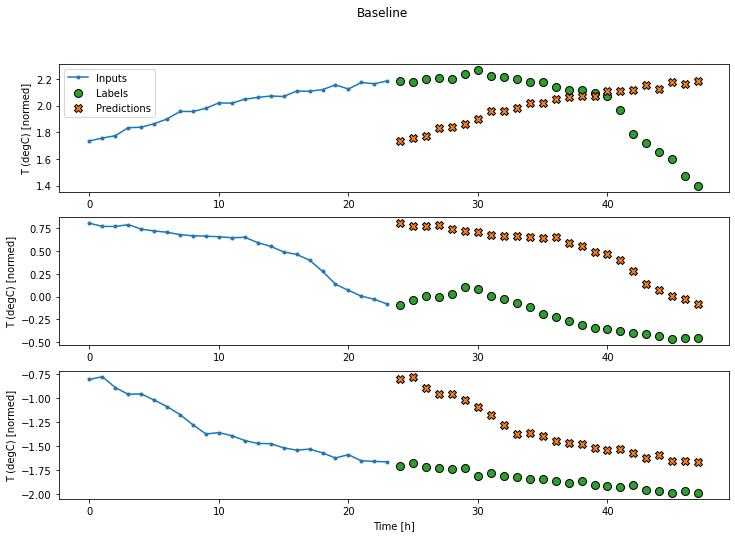

In [20]:
wide_window.plot(baseline,title='Baseline')

In [21]:
MAX_EPOCHS = 10

def compile_and_fit(model, window, patience=2):
  early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')

  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])

  history = model.fit(window.train, epochs=MAX_EPOCHS,
                      validation_data=window.val,
                      callbacks=[early_stopping])
  return history

In [22]:
lstm_model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(32, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)
])

history = compile_and_fit(lstm_model, wide_window)

#IPython.display.clear_output()
val_performance['LSTM'] = lstm_model.evaluate(wide_window.val)
performance['LSTM'] = lstm_model.evaluate(wide_window.test, verbose=0)

Epoch 1/10
2875/2875 [==============================] - 27s 8ms/step - loss: 0.1256 - mean_absolute_error: 0.2403 - val_loss: 0.0677 - val_mean_absolute_error: 0.1923
Epoch 2/10
2875/2875 [==============================] - 24s 8ms/step - loss: 0.0517 - mean_absolute_error: 0.1705 - val_loss: 0.0655 - val_mean_absolute_error: 0.1886
Epoch 3/10
2875/2875 [==============================] - 25s 9ms/step - loss: 0.0483 - mean_absolute_error: 0.1645 - val_loss: 0.0692 - val_mean_absolute_error: 0.1905
Epoch 4/10
821/821 [==============================] - 4s 5ms/step - loss: 0.0705 - mean_absolute_error: 0.1918


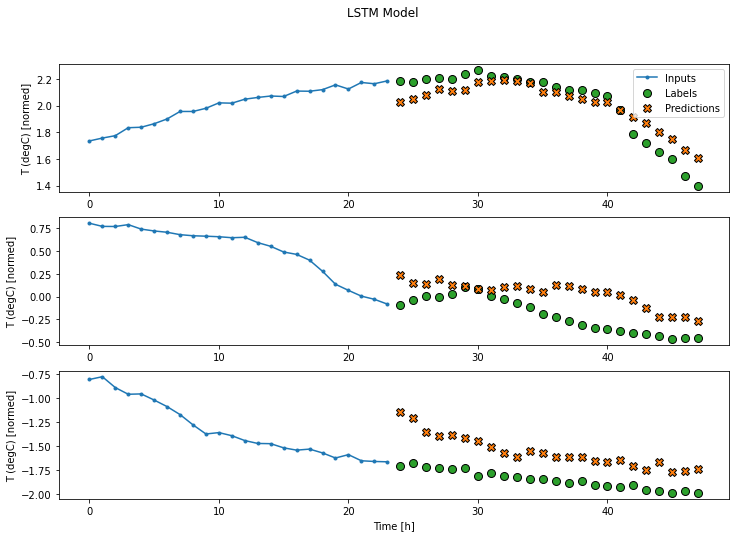

In [23]:
#plot some samples to see if it's better
wide_window.plot(lstm_model, title='LSTM Model')

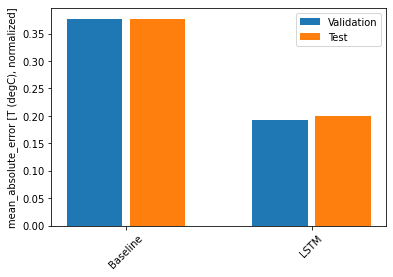

In [24]:
x = np.arange(len(performance))
width = 0.3
metric_name = 'mean_absolute_error'
metric_index = lstm_model.metrics_names.index('mean_absolute_error')
val_mae = [v[metric_index] for v in val_performance.values()]
test_mae = [v[metric_index] for v in performance.values()]

plt.ylabel('mean_absolute_error [T (degC), normalized]')
plt.bar(x - 0.17, val_mae, width, label='Validation')
plt.bar(x + 0.17, test_mae, width, label='Test')
plt.xticks(ticks=x, labels=performance.keys(),
           rotation=45)
_ = plt.legend()

In [ ]:
filename = "mpi_saale.csv"
zip_path = keras.utils.get_file(origin="https://www.bgc-jena.mpg.de/wetter/mpi_saale.zip", fname="mpi-sale")
zip_file = ZipFile(zip_path)
zip_file.extractall()
dft=pd.read_csv(filename)
print(np.shape(dft))
ts = time.time()-24*3600
print(dft.tail())

date_time = pd.to_datetime(dft.pop('Date Time'), format='%d.%m.%Y %H:%M:%S')
timestamp_s = date_time.map(datetime.timestamp)

print(dft.tail())

print(date_time.tail())

day = 24*60*60
year = (365.2425)*day

dft['Day sin'] = np.sin(timestamp_s * (2 * np.pi / day))
dft['Day cos'] = np.cos(timestamp_s * (2 * np.pi / day))
dft['Year sin'] = np.sin(timestamp_s * (2 * np.pi / year))
dft['Year cos'] = np.cos(timestamp_s * (2 * np.pi / year))
print(timestamp_s.tail())



In [ ]:
dft